<a href="https://colab.research.google.com/github/gomezan/inteligencia-artificial/blob/main/vacunaci%C3%B3nCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segunda Tarea 

Autor: Andrés David Gómez Bautista

## 1. 
<b  >
  Averiguar qué es es el "coefficient of determination"  
   </b>
   Mide el porcentaje de variabilidad en Y que puede ser explicada por la variable independiente. Es un estadístico que determina qué tan correcto es un modelo. 

## 2. 
<b  >
   Intervalo de valores que toma y explicarlos.
   </b>
   Este puede tomar valores entre 0 y 1, donde 1 es un modelo perfecto (la variabilidad de la variable dependiente puede ser completamente definida por los cambios sobre la variabe independiente) y 0 un modelo completamente falso (sin relación alguna entre abas variables). Se estima que valores superiores a 0.75, son suficientes para indicar que existe una clara relación entre la variable independiente con la dependiente.

## 3. 
<b  >
   Qué significa si da negativo o cero? puede pasar? antes de elevar por supuesto. 
   </b>
El coeficiente puede tener valores negativos a pesar de ser una métriva no negativa, en cuyo caso se debe interpreatr la cantidad como igual a 0. Es decir, si el valor del coeficiente de determinación es igual a 0 o menor a este, se asume que no existe una relación entre las variables a evaluar.   


## 4. 
<b  >
  Hallar el R cuadrado a nuestros datos de resistencia obtenidos a partir de una hipótesis lineal de 2 parámetros, cuanto les da!  
   </b>

Los datos y la gráfica de tendencia se encuentran a continuación. Notesé  que la gráfica cuenta con la ecuación de regresión y el valor ya calculado de r2.

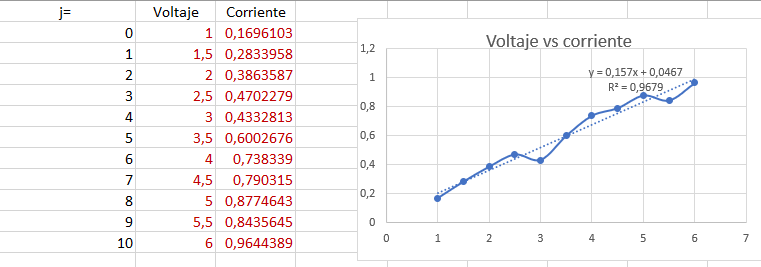

Se calcula el coeficiente de determinación mediante dos métodos diferentes:
  
1.   El primero involucra hallarla a través de la ecuación de pearson, método que usa excel por defecto con la función COEFICIENTE.R2, cuyo resultado se encuentra en azul.
2. El segundo método incluye la expresión que emplea la varianza de la variable dependiente y la varianza residual de la expresión. El proceso y resultado se encuentra en color naranja.

Los resultados entre ambos son congruentes, aunque exista una pequeña variación entre ambos.




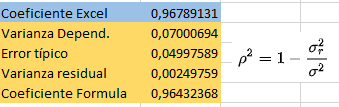

## 5. 
<b  >
  Revisar paquetes de visualización:https://seaborn.pydata.org/tutorial/regression.html.
   </b>

## 6. 
<b  >
   Realizar por lo menos 3 regresiones para los datos de vacunación de Colombia. X son los días desde la primera vacuna y Y el número de vacunas puestas ese día. Suponga usted varias funciones de hipótesis, mida usando r^2, para diferentes funciones de hipótesis. (https://www.kaggle.com/gpreda/covid-world-vaccination-progress). Compare sus resultados. NOTA DE AYUDA: inicie con la regresión lineal, y después puede usar una polinomial de segundo y para terminar una de tercer orden. (ver en los videos de la semana 5 2021-1 segunda clase último video un resumen de la tarea detallado.)  
   </b>


### importar repositorio kaggle

En esta sección se sube la información del repositorio de kaggle al cuaderno.




In [2]:
! pip install -q kaggle

Importar el token de Kaggle.

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gomezan","key":"5dd5565ea9ab0a337882821ef91aec51"}'}

Guardar y acceder a los servicios de kaggle.

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Solicitar la descarga del dataset.

In [5]:
! kaggle datasets download -d gpreda/covid-world-vaccination-progress

  0% 0.00/942k [00:00<?, ?B/s]
100% 942k/942k [00:00<00:00, 64.4MB/s]


Descomprimir el zip del dataset.

In [6]:
! unzip covid-world-vaccination-progress.zip

Archive:  covid-world-vaccination-progress.zip
  inflating: country_vaccinations.csv  
  inflating: country_vaccinations_by_manufacturer.csv  


### Tratamiento de la información

En esta sección se pretende abrir el dataset, tomar la información adecuada y trtarla según sea conveniente.  

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sklearn.metrics as metrics

import math 

In [8]:
data = pd.read_csv("country_vaccinations.csv")
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


Se toma los datos relacionados con la vacunación en Colombia y se tratan según correponda.

In [9]:
col = data[data['country'] == 'Colombia' ]
col.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
7491,Colombia,COL,2021-02-17,18.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...
7492,Colombia,COL,2021-02-18,9935.0,NaN,NaN,9917.0,9917.0,0.02,NaN,NaN,193.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...
7493,Colombia,COL,2021-02-19,21307.0,NaN,NaN,11372.0,10644.0,0.04,NaN,NaN,208.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...
7494,Colombia,COL,2021-02-20,33140.0,NaN,NaN,11833.0,11041.0,0.06,NaN,NaN,215.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...
7495,Colombia,COL,2021-02-21,39827.0,NaN,NaN,6687.0,9952.0,0.08,NaN,NaN,194.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...


Se prepara una lista con los valores de los parámetros dependientes, correspondientes a el número de vacunas diarias. Además,  Se prepara una lista con los valores de los parámetros independientes, correpondientes a los dias de vacunación. 

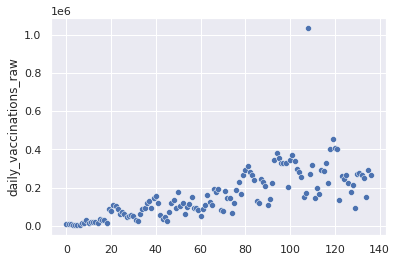

In [10]:
diario=col['daily_vaccinations_raw'].dropna()
Y=diario.tolist()

X=[]
for i in range (len(Y)):
  X.append(i)

diario=diario.reset_index(drop=True)
sns.scatterplot(data=diario)



Se toman los valores del último día de vacunación para realizar el proceso de estimación y comparación de este. 

In [11]:
yUD=Y.pop()
xUD=X.pop()

### Definición y prueba de las hipotesis. 

En esta sección se definen las funciones de hipotesis y se comparan los datos de estas con respecto a la información del dataset.

In [12]:
def funcLineal(x):
  return 9000+2100*x

def funcPolinomica(x):
  return 9000+1.155*x-0.577*x*x+0.231*x*x*x

def funcSinc(x):
  return 9000+2000*x+23658*math.sin(x)

  

def hipoLineal(x):
  y_pred=[]
  for i in x:
    res=funcLineal(i)
    y_pred.append(res)
  return y_pred 

def hipoPolinomica(x):
  y_pred=[]
  for i in x:
    res=funcPolinomica(i)
    y_pred.append(res)
  return y_pred 

def hipoSin(x):
  y_pred=[]
  for i in x:
    res=funcSinc(i)
    y_pred.append(res)
  return y_pred 

#### Hipotesis lineal

El coeeficiente de determinación de la hipotesis 1 es: 
0.4902388733212759
Mi predicción para el último dia (valor real= 266562.0 ) es: 294600 error: 10.518378463546942 %


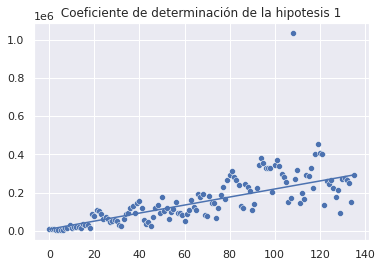

In [13]:
yPredict=hipoLineal(X)
r2Hipo1=metrics.r2_score(Y,yPredict)

print("El coeeficiente de determinación de la hipotesis 1 es: "  )
print(r2Hipo1)

estimacion=funcLineal(xUD)
error=(np.abs(yUD - estimacion) / yUD)*100
print("Mi predicción para el último dia (valor real=", yUD,") es:",estimacion,"error:",error,"%")

sns.lineplot(data=yPredict)
sns.scatterplot(data=Y)
plt.title(" Coeficiente de determinación de la hipotesis 1 ")
plt.show()

#### Hipotesis polinomica

El coeeficiente de determinación de la hipotesis 2 es:
0.01959620444243071
Mi predicción para el último dia (valor real= 266562.0 ) es: 579555.224 error: 117.41854577921835 %


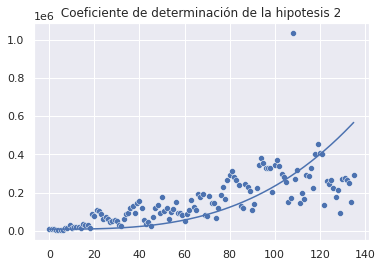

In [14]:
yPredict=hipoPolinomica(X)
r2Hipo2=metrics.r2_score(Y,yPredict)

print("El coeeficiente de determinación de la hipotesis 2 es:")
print(r2Hipo2)

estimacion=funcPolinomica(xUD)
error=(np.abs(yUD - estimacion) / yUD)*100
print("Mi predicción para el último dia (valor real=", yUD,") es:",estimacion,"error:",error,"%")

sns.lineplot(data=yPredict)
sns.scatterplot(data=Y)
plt.title(" Coeficiente de determinación de la hipotesis 2 ")
plt.show()

#### Hipotesis exponencial

El coeeficiente de determinación de la hipotesis 3 es:
0.47394986419400176
Mi predicción para el último dia (valor real= 266562.0 ) es: 262299.9311953499 error: 1.59890337131703 %


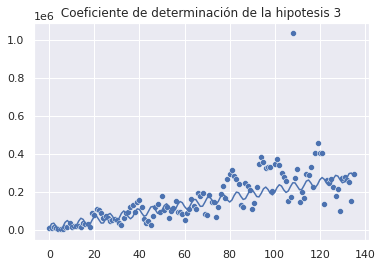

In [15]:
yPredict=hipoSin(X)
r2Hipo3=metrics.r2_score(Y,yPredict)

print("El coeeficiente de determinación de la hipotesis 3 es:")
print(r2Hipo3)


estimacion=funcSinc(xUD)
error=(np.abs(yUD - estimacion) / yUD)*100
print("Mi predicción para el último dia (valor real=", yUD,") es:",estimacion,"error:",error,"%")

sns.lineplot(data=yPredict)
sns.scatterplot(data=Y)
plt.title(" Coeficiente de determinación de la hipotesis 3 ")
plt.show()

## Conclusiones

La meta de la tarea es estudiar el coeficiente de determinación y aplicarlo sobre diferentes tipos de modelos, donde se cuenta el ejemplo de la resistencia y las diferentes funciones de hipótesis del diario de vacunación en Colombia. 

Como primeras impresiones, se puede observar como coeficientes de determinación cercanos a 1, estan relacionados con modelos con mejor capacidad predictiva, sin embargo, la métrica parece tener problemas con respecto a la posibilidad de tener valores negativos. Esta característica no parece tener gran impacto sobre su capacidad para ser interpretado, pero empobrece su propia capacidad como métrica. Algunos autores aconsejan variaciones de esta como el r cuadrado ajustado.

Durante la investigación del coeficiente de determinación, existia bastante material que empleaba el coeficiente de correlación cómo una forma de obtener el coeficiente de determinación, dada la estrecha relación entre ambos. Sin embargo, dicha propiedad sólo existe cuando la relación entre las variables dependiente e independiente es lineal. El coeficiente de determinación es mucho mas géneral y se puede usar en relaciones de orden superior. 


## Referencias

*   colaboradores de Wikipedia. (2020b, noviembre 20). Coeficiente de determinación. Wikipedia, la enciclopedia libre. https://es.wikipedia.org/wiki/Coeficiente_de_determinaci%C3%B3n#cite_note-2
*   Martinez, E. (Ed.). (s. f.). Errores frecuentes de interpretación del coeficiente de determinación. En desconocido (pp. 327–331).


